In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv("sdss_z_mass_SSFR_halomass", sep=" ")

In [ ]:
log_SSFR = []

for i in range(63765):
  SSFR = df.loc[i]['Log_SSFR']
  log_SSFR.append(SSFR)

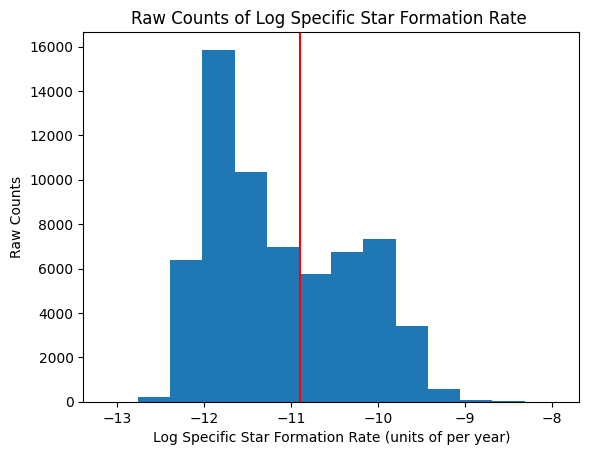

In [ ]:
#1

plt.hist(log_SSFR, bins = 14)
plt.axvline(x=-10.9, color='r')
plt.xlabel('Log Specific Star Formation Rate (units of per year)')
plt.ylabel('Raw Counts')
plt.title("Raw Counts of Log Specific Star Formation Rate ")
plt.show()

In [ ]:
#1a

SSFR_halo_less14 = []
SSFR_halo_more14 = []

for i in range(63765):
  if df.loc[i]['Log_halomass'] < 14:
    SSFR_halo_less = df.loc[i]['Log_SSFR']
    SSFR_halo_less14.append(SSFR_halo_less)
  else:
    SSFR_halo_more = df.loc[i]['Log_SSFR']
    SSFR_halo_more14.append(SSFR_halo_more)

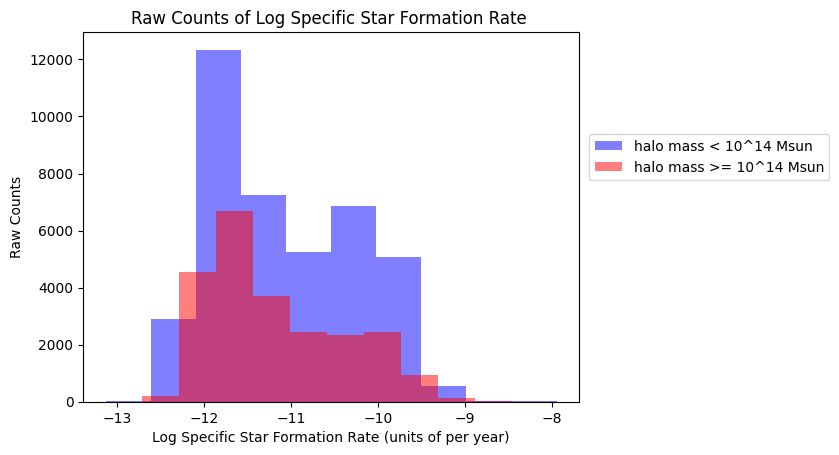

In [ ]:
plt.hist(SSFR_halo_less14, ls='dashed', alpha = 0.5, lw=3, color= 'b', label = 'halo mass < 10^14 Msun')
plt.hist(SSFR_halo_more14, ls='dotted', alpha = 0.5, lw=3, color= 'r', label = 'halo mass >= 10^14 Msun')
plt.xlabel('Log Specific Star Formation Rate (units of per year)')
plt.ylabel('Raw Counts')
plt.title("Raw Counts of Log Specific Star Formation Rate ")
plt.legend(loc=(1.02, 0.6))
plt.show()

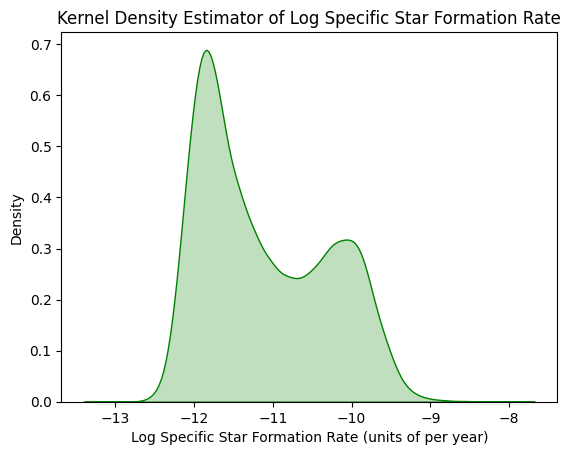

In [ ]:
res = sns.kdeplot(log_SSFR,color='green',fill=True)
plt.xlabel('Log Specific Star Formation Rate (units of per year)')
plt.title("Kernel Density Estimator of Log Specific Star Formation Rate")
plt.show()

In [ ]:
#2a

log_mass = []

for i in range(63765):
  mass = df.loc[i]['Log_Galaxy_Mass']
  log_mass.append(mass)

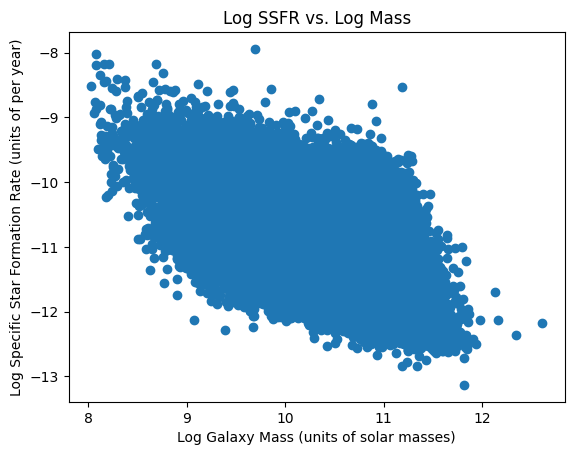

In [ ]:
plt.scatter(log_mass, log_SSFR)
plt.ylabel('Log Specific Star Formation Rate (units of per year)')
plt.xlabel('Log Galaxy Mass (units of solar masses)')
plt.title("Log SSFR vs. Log Mass")
plt.show()

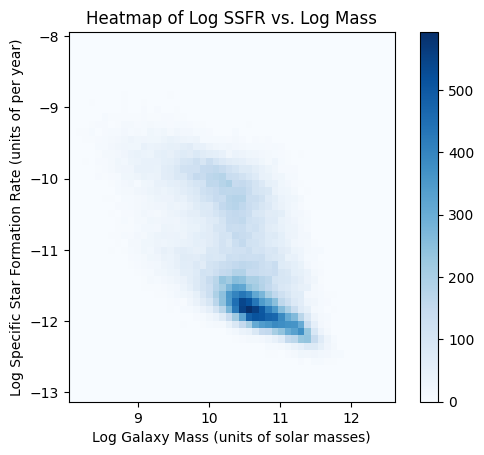

In [ ]:
heatmap, xedges, yedges = np.histogram2d(log_mass, log_SSFR, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues')
plt.colorbar()
plt.ylabel('Log Specific Star Formation Rate (units of per year)')
plt.xlabel('Log Galaxy Mass (units of solar masses)')
plt.title("Heatmap of Log SSFR vs. Log Mass")
plt.show()

In [ ]:
redshift = []

for i in range(63765):
  red = df.loc[i]['Galaxy_Redshift']
  redshift.append(red)

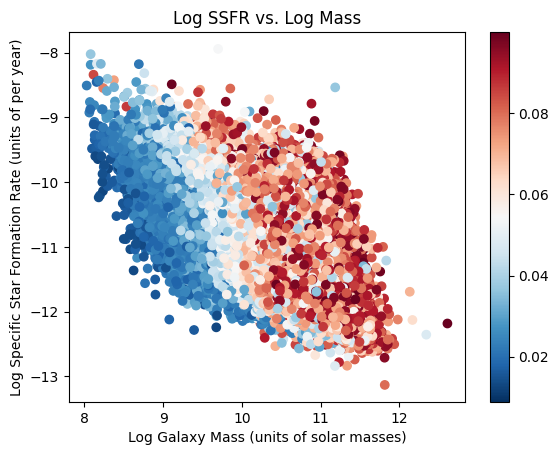

In [ ]:
#2b

plt.scatter(log_mass, log_SSFR, c= redshift, cmap = 'RdBu_r', )
plt.colorbar()
plt.ylabel('Log Specific Star Formation Rate (units of per year)')
plt.xlabel('Log Galaxy Mass (units of solar masses)')
plt.title("Log SSFR vs. Log Mass")
plt.show()

In [ ]:
#3a

#Get Star forming galaxies: any with log SSFR>=-10.9 and corresponding log mass

log_SSFR_SFR = []
log_mass_SFR = []

for i in range(63765):
  SSFR_SFR = df.loc[i]['Log_SSFR']
  mass_SFR = df.loc[i]['Log_Galaxy_Mass']
  if SSFR_SFR >= -10.9:
    log_SSFR_SFR.append(SSFR_SFR)
    log_mass_SFR.append(mass_SFR)

In [ ]:
log_SSFR_SFR = np.array(log_SSFR_SFR)
log_mass_SFR = np.array(log_mass_SFR)

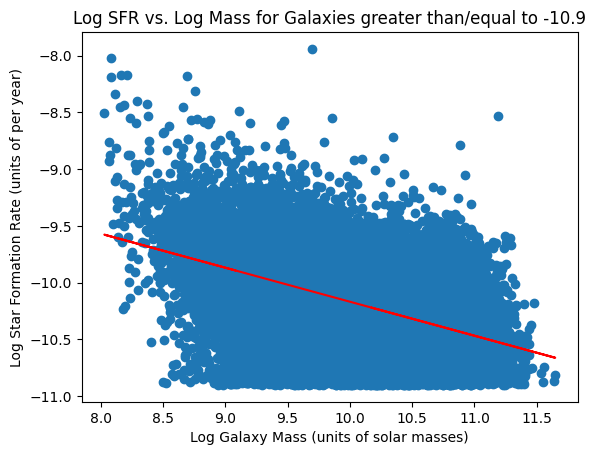

In [ ]:
a, b = np.polyfit(log_mass_SFR, log_SSFR_SFR, 1)

plt.scatter(log_mass_SFR, log_SSFR_SFR)
plt.plot(log_mass_SFR, a*log_mass_SFR+b, c='r')
plt.ylabel('Log Star Formation Rate (units of per year)')
plt.xlabel('Log Galaxy Mass (units of solar masses)')
plt.title("Log SFR vs. Log Mass for Galaxies greater than/equal to -10.9")
plt.show()

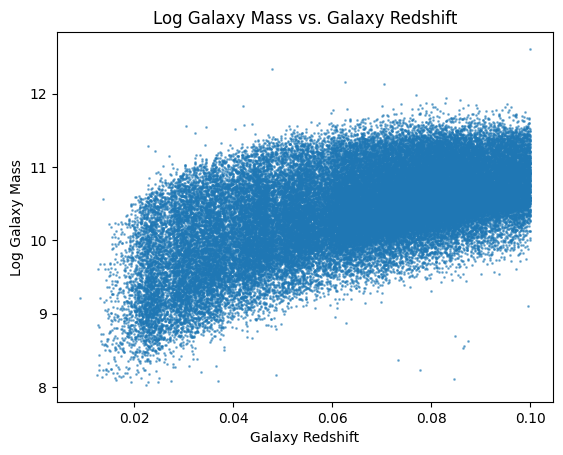

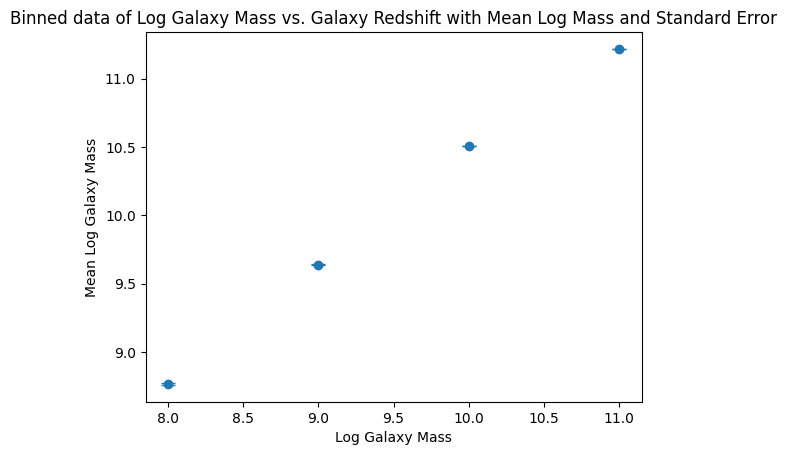

In [ ]:
#4 and 4a

# Load data from a csv file
data = pd.read_csv("sdss_z_mass_SSFR_halomass", sep=" ")

# Extract the columns of interest
log_mass = data['Log_Galaxy_Mass']
redshift = data['Galaxy_Redshift']

# Make the scatter plot
plt.scatter(redshift,log_mass, s=1, alpha=0.5)
plt.title("Log Galaxy Mass vs. Galaxy Redshift")
plt.xlabel('Galaxy Redshift')
plt.ylabel('Log Galaxy Mass')
plt.show()


# Define the bin edges
bin_edges = np.arange(8, 13, 1)

# Bin the data
bins = pd.cut(log_mass, bins=bin_edges)

# Calculate the mean Log_Galaxy_Mass in each bin
bin_means = log_mass.groupby(bins).mean()

# Calculate the standard deviation in each bin
bin_stds = log_mass.groupby(bins).std()

# Calculate the standard error of the mean in each bin
bin_sems = log_mass.groupby(bins).sem()

# Make the binned data plot
plt.errorbar(bin_edges[:-1], bin_means, yerr=bin_sems, fmt='o', capsize=5)
plt.title("Binned data of Log Galaxy Mass vs. Galaxy Redshift with Mean Log Mass and Standard Error")
plt.xlabel('Log Galaxy Mass')
plt.ylabel('Mean Log Galaxy Mass')
plt.show()


a = 1.3478658278851352
b = 0.8533501709885775


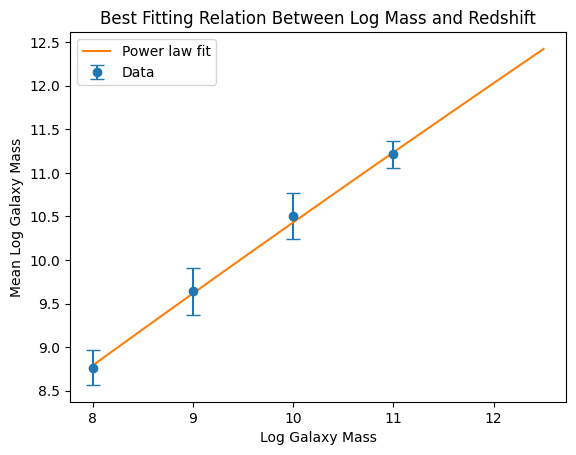

In [ ]:
#4b

from scipy.optimize import curve_fit

# Extract the columns of interest
log_mass = data['Log_Galaxy_Mass']
redshift = data['Galaxy_Redshift']

# Define the bin edges
bin_edges = np.arange(8, 13, 1)

# Bin the data
bins = pd.cut(log_mass, bins=bin_edges)

# Calculate the mean Log_Galaxy_Mass in each bin
bin_means = log_mass.groupby(bins).mean()

# Calculate the standard deviation in each bin
bin_stds = log_mass.groupby(bins).std()

# Define the power-law function to fit
def power_law(x, a, b):
    return a * (1 + x)**b

# Use curve_fit to find the best fitting parameters
popt, pcov = curve_fit(power_law, bin_edges[:-1], bin_means, sigma=bin_stds, absolute_sigma=True)

# Print the best fitting parameters
print('a =', popt[0])
print('b =', popt[1])

# Calculate the fitted values
x_fit = np.linspace(8, 12.5, 100)
y_fit = power_law(x_fit, *popt)

# Make the binned data plot
plt.errorbar(bin_edges[:-1], bin_means, yerr=bin_stds, fmt='o', capsize=5, label='Data')
plt.plot(x_fit, y_fit, '-', label='Power law fit')
plt.title("Best Fitting Relation Between Log Mass and Redshift")
plt.xlabel('Log Galaxy Mass')
plt.ylabel('Mean Log Galaxy Mass')
plt.legend()
plt.show()


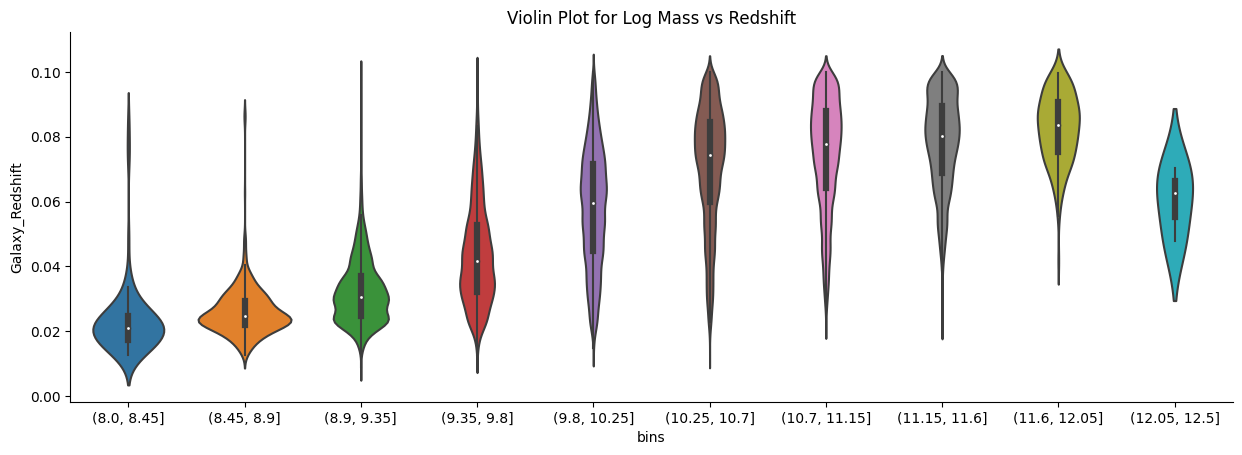

In [ ]:
import seaborn as sns

# Extract the columns of interest
log_mass = data['Log_Galaxy_Mass']
redshift = data['Galaxy_Redshift']

# Define the bin edges
bin_edges = np.linspace(8, 12.5, num=11)

# Bin the data
bins = pd.cut(log_mass, bins=bin_edges)

# Add the bins to the data frame
data['bins'] = bins

# Create the violin plot
plt.figure().set_figwidth(15)
sns.violinplot(x='bins', y='Galaxy_Redshift', data=data, inner='box')
plt.title("Violin Plot for Log Mass vs Redshift")
sns.despine()


In [ ]:
#5a

ssfr_logmass_910 = []
ssfr_logmass_1011 = []

for i in range(63765):
  if (df.loc[i]['Log_Galaxy_Mass'] >=9) and (df.loc[i]['Log_Galaxy_Mass'] <= 10):
    ss = df.loc[i]['Log_SSFR']
    ssfr_logmass_910.append(ss)
  elif (df.loc[i]['Log_Galaxy_Mass'] > 10) and (df.loc[i]['Log_Galaxy_Mass'] <= 11):
    ss2 = df.loc[i]['Log_SSFR']
    ssfr_logmass_1011.append(ss2)


In [ ]:
stats.ks_2samp(ssfr_logmass_910, ssfr_logmass_1011)

KstestResult(statistic=0.4121464590275972, pvalue=0.0, statistic_location=-11.334329, statistic_sign=-1)

In [ ]:
#5b

#comparing SSFR of galaxies with redshift between 0.01 and 0.03 and those between 0.07 and 0.09

ssfr_001 = []
ssfr_007 = []

for i in range(63765):
  if (df.loc[i]['Galaxy_Redshift'] >=0.01) and (df.loc[i]['Galaxy_Redshift'] <= 0.03):
    ss001 = df.loc[i]['Log_SSFR']
    ssfr_001.append(ss001)
  elif (df.loc[i]['Galaxy_Redshift'] >= 0.07) and (df.loc[i]['Galaxy_Redshift'] <= 0.09):
    ss007 = df.loc[i]['Log_SSFR']
    ssfr_007.append(ss007)

In [ ]:
stats.ks_2samp(ssfr_001, ssfr_007)

KstestResult(statistic=0.29720884879467174, pvalue=5.846296509078188e-301, statistic_location=-11.302428, statistic_sign=-1)

In [ ]:
#6

halomass = []

for i in range(63765):
  halo = df.loc[i]['Log_halomass']
  halomass.append(halo)

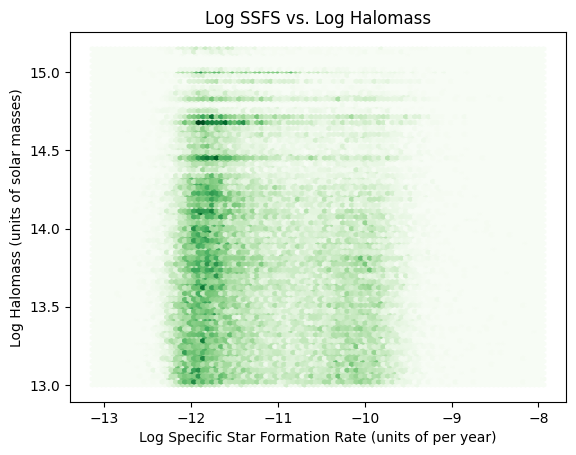

In [ ]:
plt.hexbin(log_SSFR, halomass, cmap=plt.cm.Greens)
plt.xlabel('Log Specific Star Formation Rate (units of per year)')
plt.ylabel('Log Halomass (units of solar masses)')
plt.title("Log SSFS vs. Log Halomass")
plt.show()